#ANHA4 Tracer Simulation Results

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
def plot_map(nav_lon, nav_lat, Ba_mask, lev1, title, ax):
    proj=Basemap(projection='ortho',lon_0=-40, lat_0=40, resolution='l', ax=ax)
    proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
    proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
    x, y=proj(nav_lon, nav_lat)

    CS=proj.contourf(x, y, Ba_mask, lev1, cmap=plt.cm.gist_ncar_r, extend='both')
    proj.contour(x, y, Ba_mask, lev1, linewidths=1.5, colors=('gray',))
    
    ax.set_title(title, fontsize=14)
    return CS

In [4]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary_ANHA4.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
#Ba_boundary=Boundary_Mat['Ba_boundary']
domain = Boundary_Mat['domain'].T

In [5]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ANHA4_Ba.mat')
Ba_ini_ANHA4 = MAT['Ba_ini_ANHA4']

In [6]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP03_5d_20100101_20100304_ptrc_T.nc')
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [7]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP02_1h_20100101_20100108_ptrc_T.nc')
Susan = ptrc_obj.variables['Ba'][-1, :, :, :]
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/TRP_no_ldf_1h_20100101_20100109_ptrc_T.nc')
Ba_no_ldf = ptrc_obj.variables['Ba'][-1, :, :, :]
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/TRP_no_adv_1h_20100101_20100109_ptrc_T.nc')
Ba_no_adv = ptrc_obj.variables['Ba'][-1, :, :, :]
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/TRP_no_sbc_1h_20100101_20100109_ptrc_T.nc')
Ba_no_sbc = ptrc_obj.variables['Ba'][-1, :, :, :]

# After 650 timesteps (8 days)

In [8]:
L = 0
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

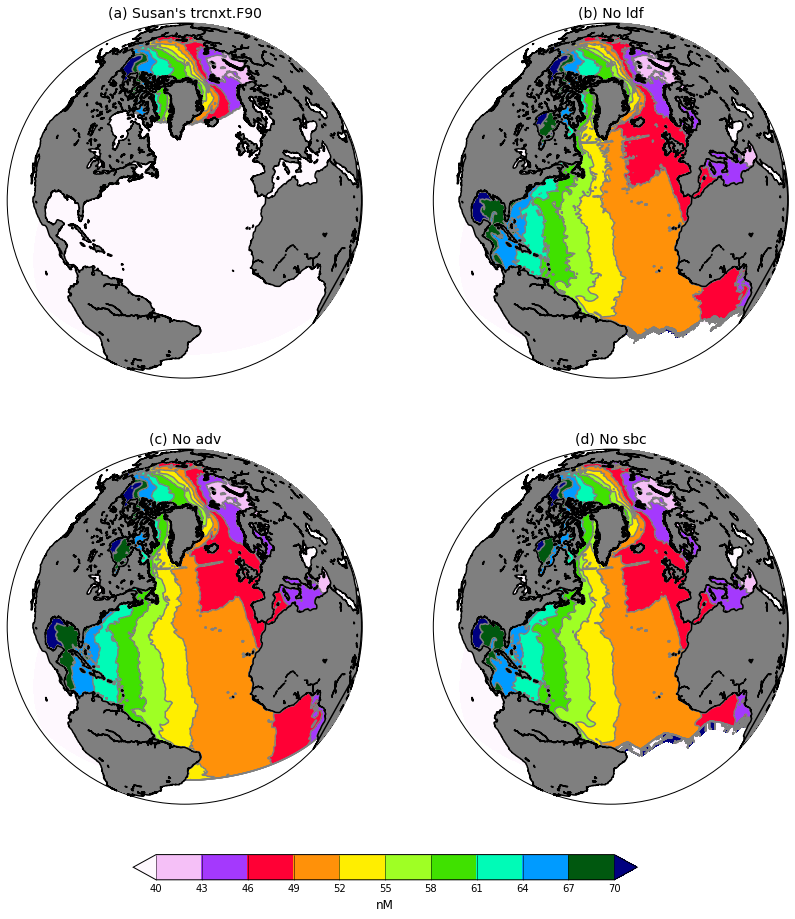

In [9]:
fig = plt.figure(figsize=(14, 14))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS = plot_map(nav_lon, nav_lat, Susan[L, :, :], lev1, "(a) Susan's trcnxt.F90", ax1)
plot_map(nav_lon, nav_lat, Ba_no_ldf[L, :, :], lev1, '(b) No ldf', ax2)
plot_map(nav_lon, nav_lat, Ba_no_adv[L, :, :], lev1, '(c) No adv', ax3)
plot_map(nav_lon, nav_lat, Ba_no_sbc[L, :, :], lev1, '(d) No sbc', ax4)

# CBar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=25)
CBar.set_ticks(lev1)

# After 6000 timesteps (about 3.5 months)

```fortran
tra(:, :, 1, jpmyt1) = tra(:, :, 1, jpmyt1) + (Ba(:, :)*sornf(:, :))/e3t(:, :, 1)/1000.0
```

In [23]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP08_5d_20100101_20100317_ptrc_T.nc')
EXP01 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob = ptrc_obj.variables['Ba'][:, 0, 600, 450]

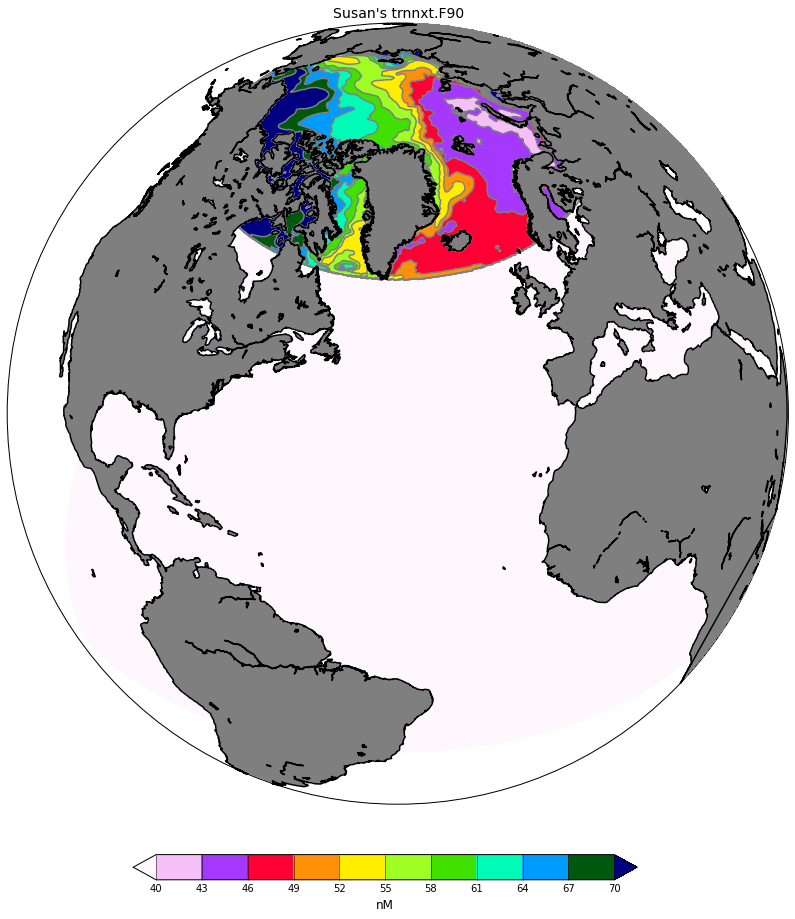

In [13]:
fig = plt.figure(figsize=(14, 14))
ax = fig.gca()

CS = plot_map(nav_lon, nav_lat, EXP01[L, :, :], lev1, "Susan's trnnxt.F90", ax)

cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=25)
CBar.set_ticks(lev1)

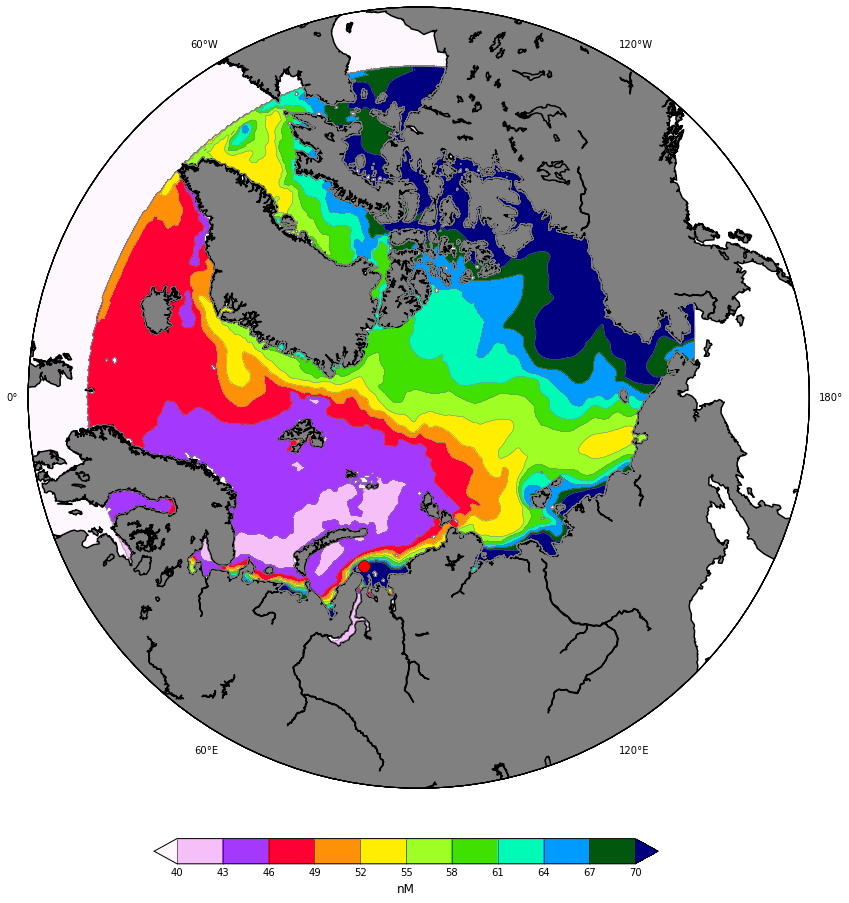

In [28]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')

x, y=proj(nav_lon, nav_lat)

CS=proj.contourf(x, y, EXP01[L, :, :], lev1, cmap=plt.cm.gist_ncar_r, extend='both')
proj.contour(x, y, EXP01[L, :, :], lev1, linewidths=0.5, colors=('gray',))
proj.plot(x[600, 450], y[600, 450], 'ro', ms=12)

cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=25)
CBar.set_ticks(lev1)

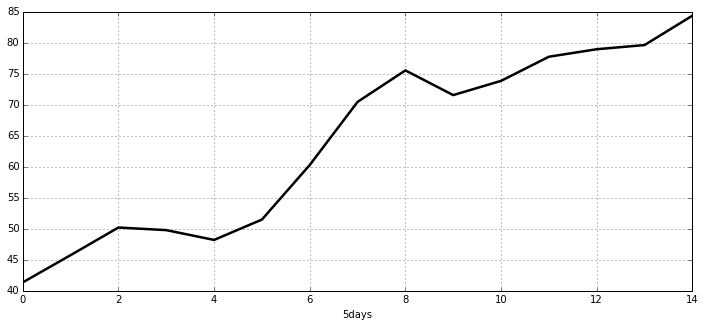

In [30]:
fig=plt.figure(figsize=(12, 5)); ax=plt.gca()
ax.plot(Ob, 'k-', linewidth=2.5); ax.grid()
ax.set_xlabel('5days')